In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2 as cv

import numpy as np
from scipy import special
from scipy.stats import kstwobign, anderson

In [3]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'

In [4]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full-rem-seps.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Plotting Out

In [5]:
df_cat

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,860686,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,1.571297e-06,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-2.881107e-06,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,4000705540034,1304538,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-6.036952e-06,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,4000705540064,1310001,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-1.023530e-05,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,4001204758614_extra,1520733,stage4,149.891374,2.866981,28107.876953,37826.437500,0.000086,0.000104,-9.313976e-07,...,-9.441206,-9.279022,-9.095134,-9.003501,-8.955496,0.120441,0.213251,0.306832,0.556012,0.731876
4177,4546055995_extra,1520749,stage2,150.383110,2.865367,16320.103516,37787.917969,0.000131,0.000236,7.123858e-05,...,-9.857880,-9.658215,-9.485625,-9.235816,-8.971795,0.162147,0.238640,0.432004,0.592193,0.687256
4178,4000927318133_extra,1523385,stage3,149.789910,2.865132,30540.179688,37782.648438,0.000045,0.000059,1.600747e-05,...,-9.525900,-9.472779,-9.353454,-9.273221,-9.213521,0.262676,0.355466,0.410356,0.489105,0.566003
4179,4000747939904_extra,1524909,stage3,150.450581,2.872371,14702.710938,37956.468750,0.000248,0.000292,7.378556e-06,...,-9.556987,-9.385500,-9.154130,-9.026810,-8.938077,0.153294,0.283249,0.436332,0.600615,0.693621


In [6]:
df_red_tmp = df_cat.query('ez_sfr < 10')
df_red = df_red_tmp.query('lp_mass_best > 6.5')

In [7]:
x1 = np.linspace(5.5, 14, 10)
x2 = np.linspace(-5.5, 4.0, 10)

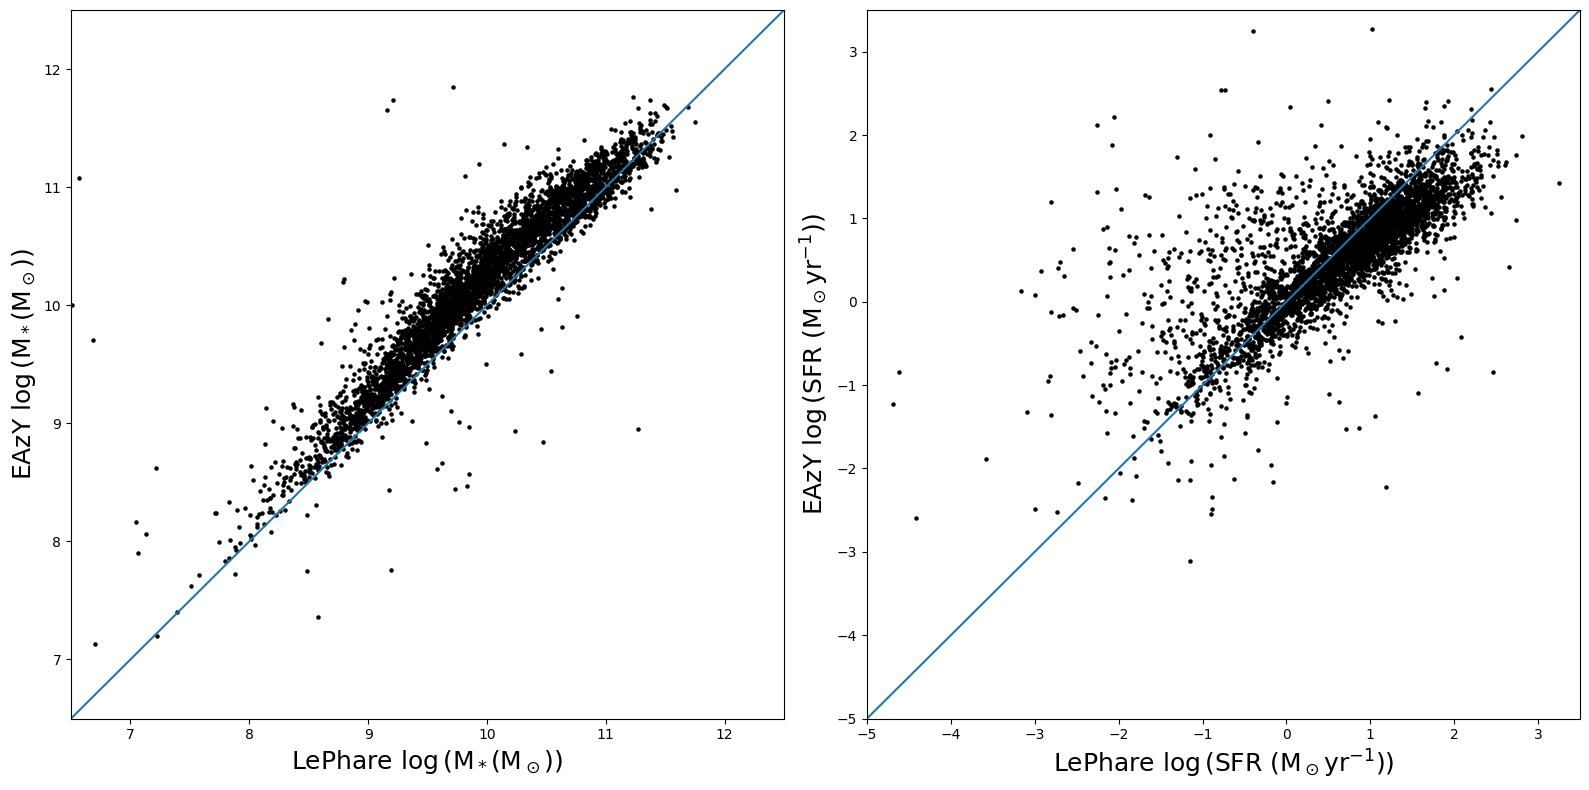

In [8]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
df_red.plot.scatter(
    x = 'lp_mass_best',
    y = 'ez_mass',
    color = 'black',
    s=5,
    ax=ax[0]
)
ax[0].plot(x1,x1)
ax[0].set_xlim(6.5, 12.5)
ax[0].set_ylim(6.5, 12.5)
ax[0].set_xlabel('LePhare $\log$(M$_*$(M$_\odot$))', fontsize = 18)
ax[0].set_ylabel('EAzY $\log$(M$_*$(M$_\odot$))', fontsize = 18)

df_red.plot.scatter(
    x = 'lp_SFR_best',
    y = 'ez_sfr',
    color = 'black',
    s=5,
    ax=ax[1]
)
ax[1].plot(x2,x2)
ax[1].set_xlim(-5, 3.5)
ax[1].set_ylim(-5, 3.5)
ax[1].set_xlabel('LePhare $\log$(SFR (M$_\odot$yr$^{-1}$))', fontsize = 18)
ax[1].set_ylabel('EAzY $\log$(SFR (M$_\odot$yr$^{-1}$))', fontsize = 18)

fig.tight_layout()

fig.savefig(f'{fig_folder}/mass-sfr-scatter.pdf', bbox_inches = 'tight')

plt.show()

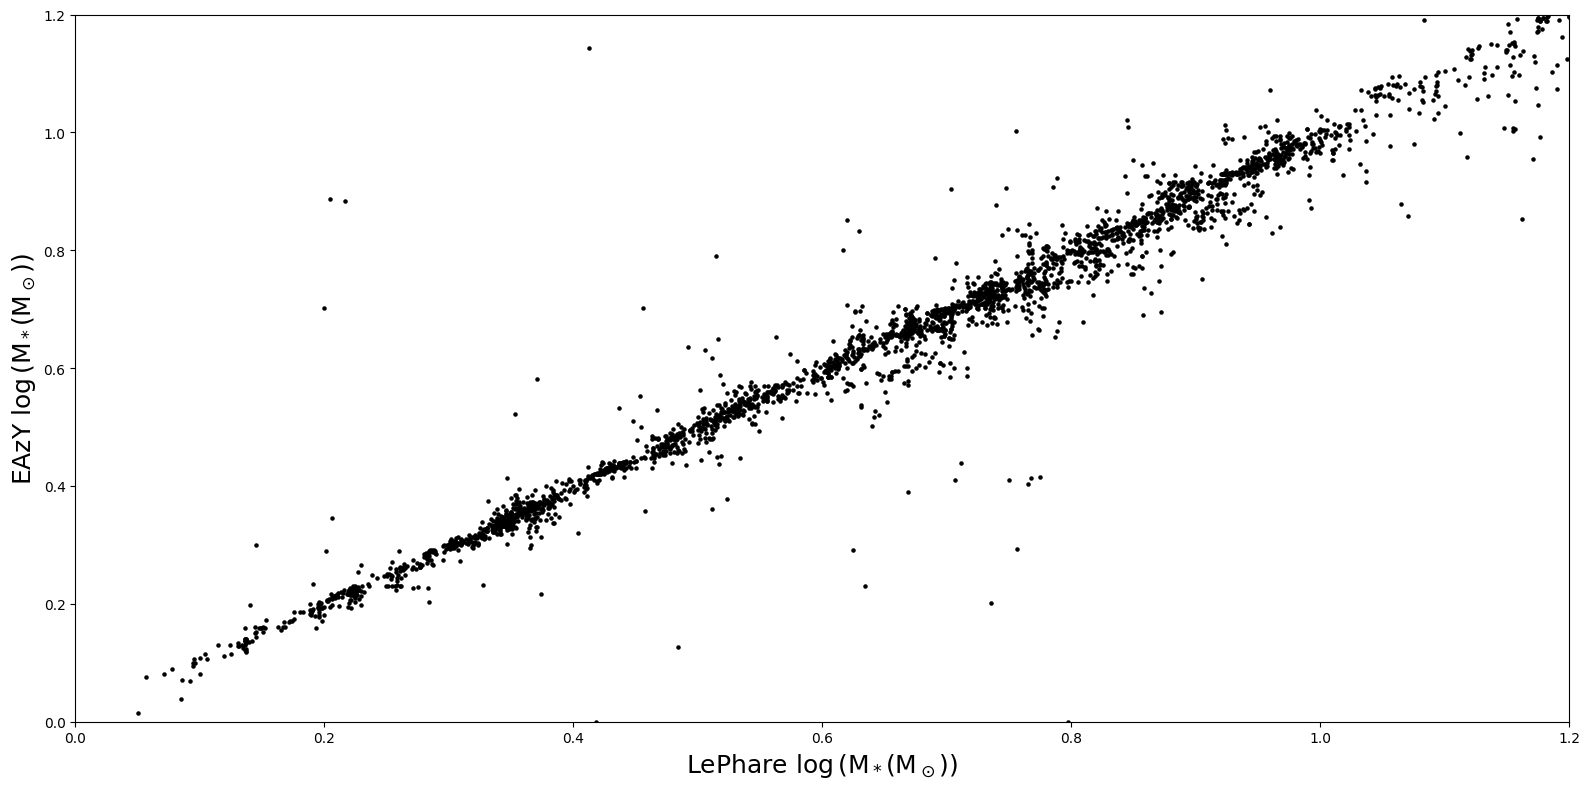

In [9]:
fig, ax = plt.subplots(figsize = (16,8))
df_red.plot.scatter(
    x = 'ez_z_phot',
    y = 'lp_zBEST',
    color = 'black',
    s=5,
    ax=ax
)
# ax.plot(x1,x1)
ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)
ax.set_xlabel('LePhare $\log$(M$_*$(M$_\odot$))', fontsize = 18)
ax.set_ylabel('EAzY $\log$(M$_*$(M$_\odot$))', fontsize = 18)

fig.tight_layout()

# fig.savefig(f'{fig_folder}/mass-sfr-scatter.pdf', bbox_inches = 'tight')

plt.show()

In [10]:
def get_diff(lp_z, ez_z):
    diff = lp_z - ez_z
    if np.isnan(diff):
        return 0
    return diff

In [11]:
df_z = (
    df_red[['ORyanID_23', 'ID', 'lp_zBEST', 'ez_z_phot']]
    .assign(z_diff = df_red.apply(lambda row: get_diff(row.lp_zBEST, row.ez_z_phot), axis = 1))
)

In [12]:
df_z

,ORyanID_23,ID,lp_zBEST,ez_z_phot,z_diff
0,4000705532455,816891,0.5304,0.519525,0.010875
1,4000705533383,860686,1.1244,1.198015,-0.073615
2,4000705539941,1301188,NaN,0.230293,0.000000
3,4000705540034,1304538,NaN,1.024009,0.000000
4,4000705540064,1310001,0.4864,0.501348,-0.014948
...,...,...,...,...,...
4176,4001204758614_extra,1520733,NaN,0.484922,0.000000
4177,4546055995_extra,1520749,NaN,0.647512,0.000000
4178,4000927318133_extra,1523385,NaN,0.301645,0.000000
4179,4000747939904_extra,1524909,NaN,0.855695,0.000000


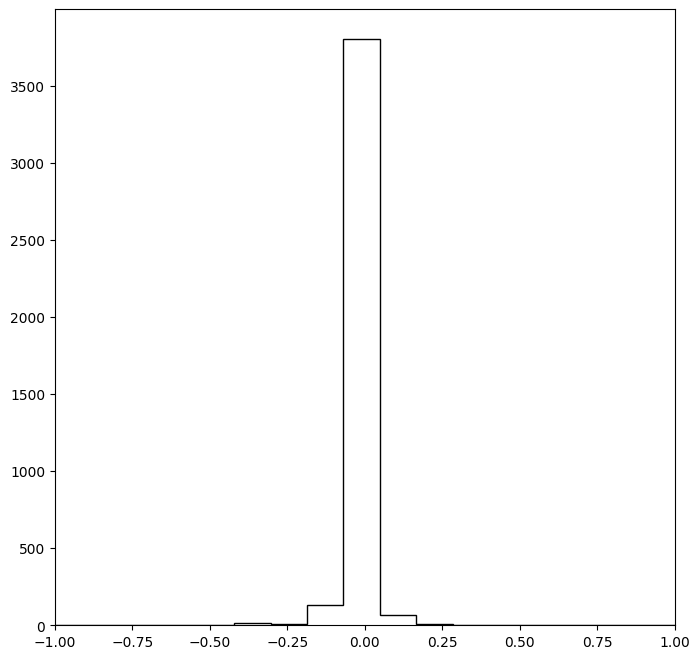

In [13]:
plt.figure(figsize = (8,8))
plt.hist(df_z.z_diff, bins = 60, color = 'black', histtype = 'step')
plt.xlim([-1, 1])
plt.show()

In [14]:
df_keep = (
    df_z
    .query('z_diff > -0.25 and z_diff < 0.25')
)

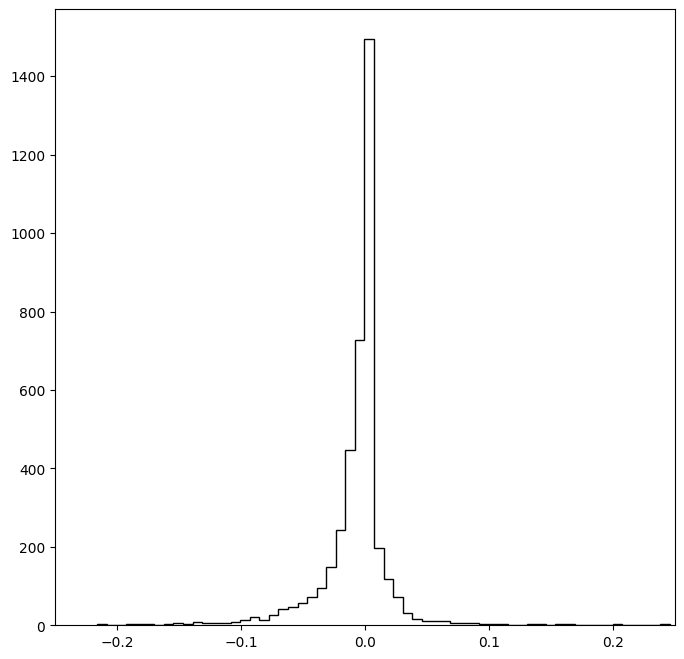

In [15]:
plt.figure(figsize = (8,8))
plt.hist(df_keep.z_diff, bins = 60, color = 'black', histtype = 'step')
plt.xlim([-0.25, 0.25])
plt.show()

In [16]:
len(df_keep)

4019

In [17]:
df_tmp = (
    df_z
    .query('z_diff > -0.1 and z_diff < 0.1')
)
len(df_tmp)

3932

In [18]:
df_to_merge = df_tmp[['ID']]

In [19]:
df_merged = df_to_merge.merge(df_cat, on = 'ID', how = 'left')

In [20]:
df_merged.to_csv(f'{combine_fold}/dor-all-restaged-full-rem-seps-z.csv')